In [55]:
import numpy as np
import pandas as pd

In [58]:
df1 = pd.read_csv('../data/is_ethicity_superior_meaning|is_ethicity_aggressor_meaning|is_ethicity_dangerous_meaning_eth_group_lemm_text.csv')

df1.head()

,Unnamed: 0,document.id,lemm_text,stage,assessor,is_ethicity_superior_meaning,is_ethicity_aggressor_meaning,is_ethicity_dangerous_meaning,eth_group_to_code
0,0,885072939,грузин mia бред написать какой русский вообще ...,3,mintbreeze,irrel,irrel,no,грузин
1,1,885072939,абхаз mia бред написать какой русский вообще г...,3,mintbreeze,irrel,irrel,no,абхаз
2,3,885072939,грузин mia бред написать какой русский вообще ...,3,adzhigitova,irrel,irrel,irrel,грузин
3,4,885072939,абхаз mia бред написать какой русский вообще г...,3,adzhigitova,irrel,irrel,irrel,абхаз
4,5,885072939,русский mia бред написать какой русский вообще...,3,adzhigitova,irrel,victim,no,русский


In [59]:
df1 = pd.read_csv('../data/is_ethicity_superior_meaning|is_ethicity_aggressor_meaning|is_ethicity_dangerous_meaning_eth_group_lemm_text.csv')

df1 = df1[df1['assessor'] == 'adzhigitova'][df1['stage'] == 2]

cols = [
    'is_ethicity_superior_meaning',
    'is_ethicity_aggressor_meaning',
    'is_ethicity_dangerous_meaning'   
]
k = 2

df1 = df1[['document.id', 'lemm_text', cols[k]]]

# this gives us the size of the array
print('Dataset size', df1.shape)

# here we can get size of array as two variables
num_rows1, num_feature1 = df1.shape

print('row number: ', num_rows1)
print('feature number: ', num_feature1)
print()
print('names of features: ', list(df1))

Dataset size (5761, 3)
row number:  5761
feature number:  3

names of features:  ['document.id', 'lemm_text', 'is_ethicity_dangerous_meaning']


/tmp/ipykernel_1764097/1845710786.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df1 = df1[df1['assessor'] == 'adzhigitova'][df1['stage'] == 2]


In [60]:
# # уберем самый большой класс
# irrel_df= df1[df1["is_ethicity_superior_meaning"] == "irrel"]
# high_df= df1[df1["is_ethicity_superior_meaning"] == "high"]
# low_df= df1[df1["is_ethicity_superior_meaning"] == "low"]

# new_data = pd.concat([irrel_df, high_df, low_df])
# print(new_data.shape)

In [61]:
new_data = df1

In [62]:
# теперь сделаем перемешивание и востановление индекса
from sklearn.utils import shuffle
shuf_data = shuffle(new_data)
print(list(shuf_data))
shuf_data.shape

['document.id', 'lemm_text', 'is_ethicity_dangerous_meaning']


(5761, 3)

In [63]:
# востоновим индексы
shuf_data.index = np.arange(len(shuf_data))

irrel     554
no       4333
yes       874
Name: is_ethicity_dangerous_meaning, dtype: int64


<Axes: >

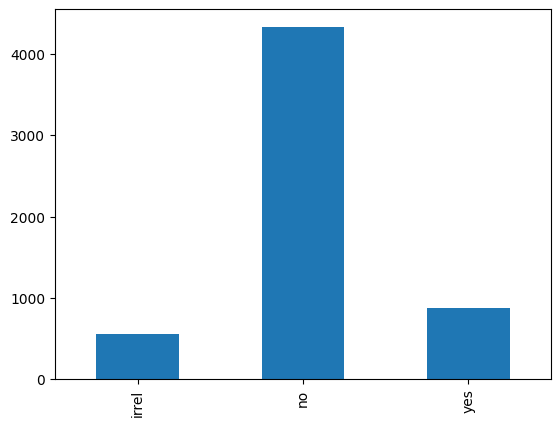

In [64]:
# давайте посмотрим распределение оценок
import matplotlib.pyplot as plt
%matplotlib inline
# value_counts () - a command that allows you to calculate the number of unique values
vc = shuf_data[cols[k]].value_counts()
vc = vc.sort_index()
print(vc)
vc.plot(kind='bar')

In [65]:
df1=shuf_data

In [66]:
# Теперь, для того что бы подать документы и лейблы в нейронную сеть
# нужно сделать небольшой препроцессинг
# 1. нужно токенезировать
# 2. преобразовать токены в набор нулей и единиц

In [67]:
# кодируем документы в нули и единицы
# проведем токенизацию с помощью keras
from keras.preprocessing.text import Tokenizer
t = Tokenizer(num_words=5000)
t.fit_on_texts(df1['lemm_text'])
encoded_docs = t.texts_to_matrix(df1['lemm_text'], mode='count')
# print(encoded_docs)
# Такие документы можно подавать на вход сети

In [68]:
# размер матрицы
print(encoded_docs.shape)
num_doc, num_words = encoded_docs.shape
# 8650 - число документов
# 64551 - число фич (число слов) - размер словаря

(5761, 5000)


In [69]:
df1

,document.id,lemm_text,is_ethicity_dangerous_meaning
0,391573251,американец долбо зуб какой братский земля крым...,no
1,928503285,русский после окончание война день балтика зат...,irrel
2,327575294,таджик re теракт волгоград отделение кавказ ис...,no
3,1007829197,кумык сегодня буйнакск митинг улица чкалов мэр...,yes
4,461655537,калмык ещё женатый жить россия,no
...,...,...,...
5756,384140940,якут степан бот угомониться плохо готовить моч...,no
5757,887901289,татарин ответить королёв писать ошик главный х...,no
5758,893432160,туркмен сильно пробрать песня видеоклип youtub...,no
5759,1069375675,хач сафоника писать спина мочь сказать хач лиц...,no


In [70]:
# Разделим наш датасет на тренировочную и тестовую часть
from sklearn.model_selection import train_test_split
# делим даанные на тестовую и тренировочную коллекцию
x_train, x_valid, y_train, y_valid = train_test_split(encoded_docs,
                                                      df1[cols[k]],
                                                      random_state=3,
                                                      test_size=0.3)
print('x_train: ', x_train.shape)
print('x_valid: ', x_valid.shape)
print('------------------------------')
print('y_train: ' , y_train.shape)
print('y_valid: ' , y_valid.shape)

x_train:  (4032, 5000)
x_valid:  (1729, 5000)
------------------------------
y_train:  (4032,)
y_valid:  (1729,)


In [71]:
# теперь сделаем препоцессинг лейблов
y_dummy_train = pd.get_dummies(y_train)
y_dummy_train

,irrel,no,yes
323,0,1,0
3302,0,1,0
4723,1,0,0
5256,0,1,0
5604,0,1,0
...,...,...,...
789,0,1,0
968,1,0,0
1667,0,1,0
3321,0,0,1


In [72]:
# теперь сделаем препоцессинг лейблов
y_dummy_valid = pd.get_dummies(y_valid)
y_dummy_valid

,irrel,no,yes
914,0,1,0
940,1,0,0
5508,0,0,1
4761,0,1,0
1125,0,1,0
...,...,...,...
1965,0,0,1
938,0,1,0
5716,0,1,0
3429,0,1,0


In [73]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3, weights='distance', metric='cosine')
neigh.fit(x_train, y_train)

KNeighborsClassifier(metric='cosine', n_neighbors=3, weights='distance')

In [74]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

pred = neigh.predict(x_valid)
f1_score(y_valid, pred, average='macro'), accuracy_score(y_valid, pred)


(0.6718911025521462, 0.8224407171775593)

In [75]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

clf = MultinomialNB(force_alpha=True)
clf.fit(x_train, y_train)

pred = clf.predict(x_valid)
f1_score(y_valid, pred, average='macro'), accuracy_score(y_valid, pred)

(0.6303991323359316, 0.763447079236553)

### тeперь можно построить сеть прямого распространения
создание, обучение и оценка каествасети состоит из следующих этапов
1. создание сети
2. компиляция сети
3. обучение сети
4. оценка качества

# простая сеть

In [76]:
# создание сети
from keras import models
from keras import layers

model = models.Sequential()

model.add(layers.Dense(64, activation='relu', input_shape=(5000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
# Dropout - дает возможно забывать сетью часть своих нейронов
model.add(layers.Dropout(0.1))
model.add(layers.Dense(3, activation='softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 64)                320064    
                                                                 
 dense_13 (Dense)            (None, 64)                4160      
                                                                 
 dense_14 (Dense)            (None, 64)                4160      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_15 (Dense)            (None, 3)                 195       
                                                                 
Total params: 328,579
Trainable params: 328,579
Non-trainable params: 0
_________________________________________________________________


# RNN сеть

In [31]:
# построение модели
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding
from keras.layers import SimpleRNN, Reshape
from keras import layers

model = Sequential()

model.add(layers.Dense(64, activation='relu', input_shape=(5000,)))
model.add(Reshape((1, 64)))
model.add(SimpleRNN(64))
model.add(Dense(64, activation='relu'))
# Dropout - дает возможно забывать сетью часть своих нейронов
model.add(layers.Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                320064    
                                                                 
 reshape (Reshape)           (None, 1, 64)             0         
                                                                 
 simple_rnn (SimpleRNN)      (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 64)                4160      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_6 (Dense)             (None, 64)                4160      
                                                                 
 dense_7 (Dense)             (None, 3)                

# LST сеть

In [43]:
# построение модели
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding
from keras.layers import SimpleRNN, Reshape
from keras import layers
from keras.layers import LSTM

model = Sequential()

model.add(layers.Dense(64, activation='relu', input_shape=(5000,)))
model.add(Reshape((1, 64)))
model.add(LSTM(64))
model.add(Dense(64, activation='relu'))
# Dropout - дает возможно забывать сетью часть своих нейронов
model.add(layers.Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 64)                320064    
                                                                 
 reshape_1 (Reshape)         (None, 1, 64)             0         
                                                                 
 lstm (LSTM)                 (None, 64)                33024     
                                                                 
 dense_9 (Dense)             (None, 64)                4160      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_10 (Dense)            (None, 64)                4160      
                                                                 
 dense_11 (Dense)            (None, 3)                

2023-06-20 23:31:28.271171: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-06-20 23:31:28.271843: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-06-20 23:31:28.272514: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [77]:
# 2. компиляция сети
# теперь нужно скомпелировать нашу сеть
# optimizer='rmsprop' - алгоритм обучения сети
# loss='categorical_crossentropy'
# metrics=['accuracy'] - тип метрики качества
# loss='categorical_crossentropy' - функция потерь, которая будет минимизироваться
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [78]:
# 3. обучение сети
# запускаем процесс обучения сети
# x_train, y_train - датасет на котором обучаем сеть
# epochs=9 - число эпох обучения
# batch_size=512
# validation_data - датасет на котором производится проверка качества обученной модели
model.fit(x_train, y_dummy_train, epochs=20, batch_size=512, validation_data=(x_valid, y_dummy_valid))

Epoch 1/20
8/8 [==============================] - 1s 23ms/step - loss: 0.9327 - accuracy: 0.6503 - val_loss: 0.7277 - val_accuracy: 0.7525
Epoch 2/20
8/8 [==============================] - 0s 9ms/step - loss: 0.6708 - accuracy: 0.7520 - val_loss: 0.6357 - val_accuracy: 0.7525
Epoch 3/20
8/8 [==============================] - 0s 9ms/step - loss: 0.5788 - accuracy: 0.7545 - val_loss: 0.5774 - val_accuracy: 0.7640
Epoch 4/20
8/8 [==============================] - 0s 9ms/step - loss: 0.5026 - accuracy: 0.7765 - val_loss: 0.5349 - val_accuracy: 0.8022
Epoch 5/20
8/8 [==============================] - 0s 10ms/step - loss: 0.4357 - accuracy: 0.8309 - val_loss: 0.5086 - val_accuracy: 0.8282
Epoch 6/20
8/8 [==============================] - 0s 9ms/step - loss: 0.3683 - accuracy: 0.8718 - val_loss: 0.4980 - val_accuracy: 0.8276
Epoch 7/20
8/8 [==============================] - 0s 8ms/step - loss: 0.3208 - accuracy: 0.8854 - val_loss: 0.5054 - val_accuracy: 0.8178
Epoch 8/20
8/8 [================

In [79]:
# выводим качество работы сети
results = model.evaluate(x_valid, y_dummy_valid)

55/55 [==============================] - 0s 598us/step - loss: 0.6955 - accuracy: 0.8276


In [80]:
print(results)

[0.6954954862594604, 0.827646017074585]


In [81]:
# Предсказание
predictions = model.predict(x_valid)
#  число оценок и размер оценок в предсказании
print(predictions.shape)
print(predictions)

55/55 [==============================] - 0s 507us/step
(1729, 3)
[[2.2437966e-03 3.3457372e-01 6.6318256e-01]
 [2.3532030e-01 2.4980113e-02 7.3969954e-01]
 [3.6364573e-04 9.0792912e-01 9.1707341e-02]
 ...
 [1.4522616e-03 3.6547816e-01 6.3306963e-01]
 [1.2234662e-07 9.9999696e-01 2.9035159e-06]
 [1.8026656e-03 9.5034456e-01 4.7852714e-02]]


In [82]:
# Давайте оценим результат предсказания по классам - 2 класса
# Для этого преобразуем полученные вероятности по классам в конкретный класс
# то есть в качестве итогового класса берется класс с максимальной вероятностью
y_preds = np.argmax(predictions, axis=1).tolist()

for i in range(len(y_preds)):
    if y_preds[i]==0: y_preds[i]='irrel'
    if y_preds[i]==1: y_preds[i]='no'
    if y_preds[i]==2: y_preds[i]='yes'
        

In [83]:
# Давайте оценим результат предсказания по классам
# Для этого преобразуем полученные вероятности по классам в конкретный класс
# то есть в качестве итогового класса берется класс с максимальной вероятностью
#y_preds = np.argmax(predictions, axis=1).tolist()
# 2- positive
# 1- neutral
# 0- negative
#for i in range(len(y_preds)):
#    if y_preds[i]==2: y_preds[i]='low'
#    if y_preds[i]==1: y_preds[i]='irrel'
#    if y_preds[i]==0: y_preds[i]='high'

In [84]:
# получили предсказание в терминах классов
#y_preds

In [85]:
# также сделаем обратное преобразование лейблов из тестового датасета обратно в классы
yy = y_dummy_valid.idxmax(axis=1)

In [86]:
#yy

In [87]:
#  Теперь мы можем расчитать качество по каждому классу
from sklearn import metrics
from sklearn.metrics import classification_report
print(metrics.classification_report(y_preds, yy))

              precision    recall  f1-score   support

       irrel       0.47      0.57      0.51       136
          no       0.92      0.89      0.90      1349
         yes       0.60      0.64      0.62       244

    accuracy                           0.83      1729
   macro avg       0.66      0.70      0.68      1729
weighted avg       0.84      0.83      0.83      1729

